# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Widget-parametrization" data-toc-modified-id="Widget-parametrization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Widget parametrization</a></div>

# Widget parametrization 

In [16]:
from __future__ import print_function
import requests
import json
from pprint import pprint
from IPython.display import display, Markdown, HTML
import pandas as pd
from ipywidgets import DatePicker, interact, Textarea, Layout, Dropdown
import ipywidgets as widgets
from datetime import datetime
from vega import Vega
from urllib.parse import urlparse

In [14]:
widgets.__version__

'7.0.3'

In [2]:
api_baseurl = 'https://api.resourcewatch.org/v1'

def julian_day(date):
    first_dayyear=datetime(date.year,1,1)
    return abs(date - first_dayyear).days + 1


def visualization(widget, base_queryUrl, sql, date_begin, date_end, geostore=None):
    
    api_widgetapi = api_baseurl + '/widget/{0}'.format(widget)
    payload = {"queryUrl":base_queryUrl.format(sql.format(date_begin=date_begin.isoformat(), date_end=date_end.isoformat()))}
    if geostore!=None:
        payload.update({'geostore':geostore})
    r = requests.get(api_widgetapi, params=payload)
    if r.status_code != 200:
        print(r.json())
    else:
        spec = json.dumps(r.json()['data']['attributes']['widgetConfig'])
        print("#### Call:  ");
        print(">```  {0}  ```".format(r.url));
        print("#### Response:  ");
        print("""> ```json  
        {0}  ```""".format((r.text)));

We are going to use this dataset `20cc5eca-8c63-4c41-8e8e-134dcf1e6d76` (Active Fires VIIRS) as an example for widget creation.  
`http://api.resourcewatch.org/fields/:dataset_id`  

We are going to pass the next params to the above url so we can modify the data url inside the first table in vega spec.
`<widget-url>?<params>`
#### Params:
```json  
{
"queryUrl":"<url that gives back data in json format>",
"geostore":"<geostore>",
    ...
}
```

The api will substitute the url params stored in the widget and will concatenate all params added.

With this we can define the sql query that we want to use. It is very important, if you are parametrizing the queries, you will need to make sure you keep the same columns and their aliases  
```sql
SELECT julian_day as x, count(julian_day) 
FROM index_e663eb0904de4f39b87135c6c2ed10b5 
WHERE confidence > 50 and year > {year_begin} and julian_day >{dayyear_begin} and year < {year_end}  and julian_day < {dayyear_end}
```

Data layout example.
* Bar: 
    * Data layout:
 
| date | value |  
|---|---|  
| | |  
| | |  
* Line:
    * Data layout:
  
|x|y|  
|---|---|  
| | |  
| | |  

* Pie:
    * Data layout: 
 
|category|value|  
|---|---|  
|||  
|||  






### Lets review this with an example
We are going to define a simple widgets in vega 2.6 and add them to the api:

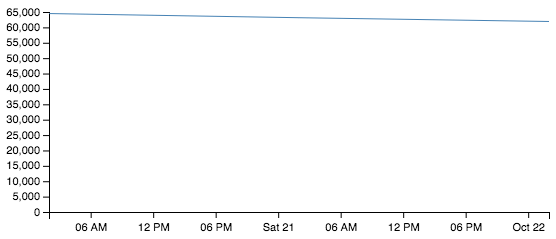

In [3]:
specs={"marks":[{"properties":{"hover":{"stroke":{"value":"red"}},"update":{"stroke":{"value":"steelblue"}},"enter":{"y":{"field":"y","scale":"y"},"x":{"field":"x","scale":"x"}}},"from":{"data":"table"},"type":"line"}],"axes":[{"scale":"x","type":"x"},{"scale":"y","type":"y"}],"scales":[{"domain":{"field":"x","data":"table"},"range":"width","type":"time","name":"x"},{"nice":True,"domain":{"field":"y","data":"table"},"range":"height","type":"linear","name":"y"}],"data":[{"format":{"parse":{"x":"date"},"property":"data","type":"json"},"url":"https://api.resourcewatch.org/v1/query/20cc5eca-8c63-4c41-8e8e-134dcf1e6d76?sql=SELECT acq_date as x, count(acq_date) as y FROM vnp14imgtdl_nrt_global_7d WHERE acq_date >=\'2017-02-01T00:00:00\' and acq_date < \'2017-10-23T15:17:14.504268\' group by acq_date order by acq_date asc","name":"table"}],"padding":"fit","height":200,"width":500}
Vega(specs).display()

This widget can be access throw the next url:

In [4]:
display(Markdown('#### Respose: '))
display(Markdown('https://api.resourcewatch.org/v1/widget/a5796158-1342-4b1a-8a70-914d630738e2'))

#### Respose: 

{"data":{"id":"a5796158-1342-4b1a-8a70-914d630738e2","type":"widget","attributes":{"name":"Widget default","dataset":"20cc5eca-8c63-4c41-8e8e-134dcf1e6d76","slug":"Widget-default","userId":"57a0aa1071e394dd32ffe137","application":["gfw"],"verified":false,"default":false,"defaultEditableWidget":false,"published":false,"env":"production","queryUrl":"query/20cc5eca-8c63-4c41-8e8e-134dcf1e6d76?sql=SELECT acq_date as x, count(acq_date) as y FROM vnp14imgtdl_nrt_global_7d WHERE acq_date >='2017-02-01T00:00:00' and acq_date < '2017-10-23T15:17:14.504268' group by acq_date order by acq_date asc","widgetConfig":{"marks":[{"properties":{"hover":{"stroke":{"value":"red"}},"update":{"stroke":{"value":"steelblue"}},"enter":{"y":{"field":"y","scale":"y"},"x":{"field":"x","scale":"x"}}},"from":{"data":"table"},"type":"line"}],"axes":[{"scale":"x","type":"x"},{"scale":"y","type":"y"}],"scales":[{"domain":{"field":"x","data":"table"},"range":"width","type":"time","name":"x"},{"nice":true,"domain":{"field":"y","data":"table"},"range":"height","type":"linear","name":"y"}],"data":[{"format":{"parse":{"x":"date"},"property":"data","type":"json"},"url":"https://api.resourcewatch.org/v1/query/20cc5eca-8c63-4c41-8e8e-134dcf1e6d76?sql=SELECT acq_date as x, count(acq_date) as y FROM vnp14imgtdl_nrt_global_7d WHERE acq_date >='2017-02-01T00:00:00' and acq_date < '2017-10-23T15:17:14.504268' group by acq_date order by acq_date asc","name":"table"}],"padding":"fit","height":200,"width":500},"template":false,"createdAt":"2017-10-23T13:26:26.294Z","updatedAt":"2017-10-23T13:26:26.294Z"}}}

In [18]:
pos=Layout(display='flex',
                    flex_flow='row',
                    align_items='stretch',
                    width='100%')
options= {
    'widgets':Dropdown(options={'line': 'a5796158-1342-4b1a-8a70-914d630738e2','bar': '19143822-3b11-407a-b3f7-7e98f6a1a024'}, description='Widget type:'),
    'base_queryUrl':Textarea(value=api_baseurl+"/query/20cc5eca-8c63-4c41-8e8e-134dcf1e6d76?sql={0}", description='Url to query:',disabled=False, layout=pos),
    'sql': Textarea(value="SELECT acq_date as x, count(acq_date) as y FROM vnp14imgtdl_nrt_global_7d WHERE acq_date >='{date_begin}' and acq_date < '{date_end}' group by acq_date order by acq_date asc", description='Query:',layout=pos),    
    'other_params':{'geostore'},
    'date_end': DatePicker(description='Date end', disabled=False, value=datetime.today()),
    'date_begin': DatePicker(description='Date begin', disabled=False, value=datetime(2017,10,18)),
    'geostore': Dropdown(options={'Afghanistan': '37b397a9a2860beb5c43a1f418d3c3d3', 'Brazil': 'd653e4fc0ed07a65b9db9b13477566fe', 'Custom area':'ae52478dc8ffe23f7fe175611c20b684'}, description='Geostore')  
}


display(interact(visualization, widget=options['widgets'],base_queryUrl=options['base_queryUrl'], sql=options['sql'], date_begin=options['date_begin'], date_end=options['date_end'], geostore=options['geostore']));

interactive(children=(Dropdown(description='Widget type:', options={'line': 'a5796158-1342-4b1a-8a70-914d630738e2', 'bar': '19143822-3b11-407a-b3f7-7e98f6a1a024'}, value='a5796158-1342-4b1a-8a70-914d630738e2'), Textarea(value='https://api.resourcewatch.org/v1/query/20cc5eca-8c63-4c41-8e8e-134dcf1e6d76?sql={0}', description='Url to query:', layout=Layout(align_items='stretch', display='flex', flex_flow='row', width='100%')), Textarea(value="SELECT acq_date as x, count(acq_date) as y FROM vnp14imgtdl_nrt_global_7d WHERE acq_date >='{date_begin}' and acq_date < '{date_end}' group by acq_date order by acq_date asc", description='Query:', layout=Layout(align_items='stretch', display='flex', flex_flow='row', width='100%')), DatePicker(value=datetime.datetime(2017, 10, 18, 0, 0), description='Date begin'), DatePicker(value=datetime.datetime(2017, 10, 27, 11, 41, 55, 76461), description='Date end'), Dropdown(description='Geostore', options={'Afghanistan': '37b397a9a2860beb5c43a1f418d3c3d3', 'Brazil': 'd653e4fc0ed07a65b9db9b13477566fe', 'Custom area': 'ae52478dc8ffe23f7fe175611c20b684'}, value='37b397a9a2860beb5c43a1f418d3c3d3'), Output()), _dom_classes=('widget-interact',))

<function __main__.visualization>

Now in the above widget we will be able to check how does this works, if we modify the query, the result will variates.
Please copy paste in Query form input the next query:  
```sql 
SELECT acq_date as x, sum(bright_ti4) as y FROM vnp14imgtdl_nrt_global_7d WHERE acq_date >='{date_begin}' and acq_date < '{date_end}' group by acq_date order by acq_date asc
```

Have you seen how the widget config has change? Now is your turn to play with the params

In [6]:
url='https://vega.github.io/vega-editor/?mode=vega'
iframe = '<iframe src=' + url + ' sandbox="allow-scripts allow-same-origin allow-forms"   width=1200 height=500></iframe>'
HTML(iframe)

**Note**: allow third party coockies or access the page in order to test it: `https://vega.github.io/vega-editor/?mode=vega`